## TASK 1

In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [20]:
klientData1 = pd.read_table('https://courses.cs.ut.ee/MTAT.03.183/2015_spring/uploads/Main/klient1.txt', header=None)
klientData1.columns = ["time"]
klientData2 = pd.read_table('https://courses.cs.ut.ee/MTAT.03.183/2015_spring/uploads/Main/klient3.txt', header=None)
klientData2.columns = ["time"]

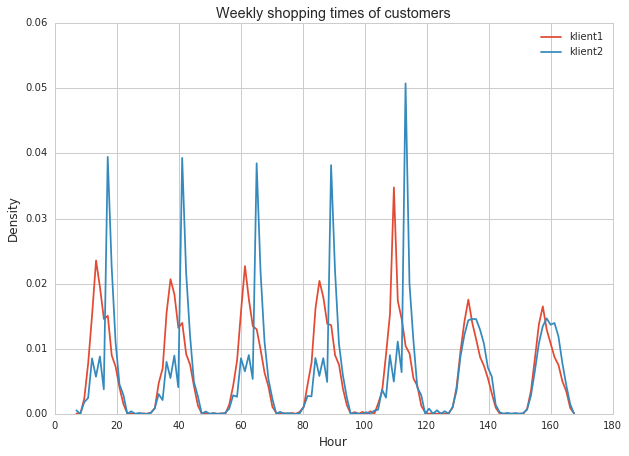

In [67]:
plt.figure(figsize=(10,7))
plt.xlabel("Hour")
plt.ylabel("Density")
plt.title("Weekly shopping times of customers")
sns.kdeplot(klientData1.time, bw=0.2, label="klient1")
sns.kdeplot(klientData2.time, bw=0.2, label="klient2")
plt.show()

## TASK 2

In [174]:
dat = pd.read_table("https://courses.cs.ut.ee/MTAT.03.183/2016_spring/uploads/Main/product_time_shop.txt", sep = ";")
weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
dat["weekday"] = [weekdays[i] for i in pd.to_datetime(dat.date, format='%Y%m%d').dt.dayofweek]
dat["date_formatted"] = pd.to_datetime(dat.date, format='%Y%m%d')

In [208]:
dat["hour"] = np.floor(dat.time / 100)

In [209]:
dat.head()

,date,time,product,shop_id,weekday,date_formatted,hour
0,20140104,900,Banana,18,Sat,2014-01-04,9
1,20140104,900,Banana,18,Sat,2014-01-04,9
2,20140104,924,Banana,18,Sat,2014-01-04,9
3,20140104,929,Banana,18,Sat,2014-01-04,9
4,20140104,932,Banana,18,Sat,2014-01-04,9


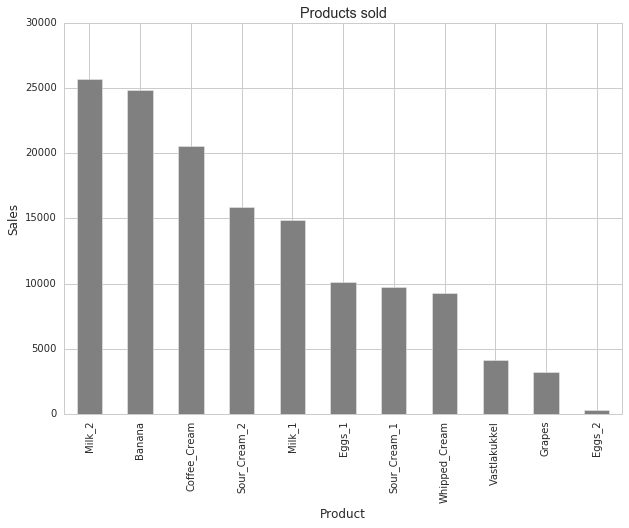

In [71]:
plt.figure(figsize=(10,7))
plt.xlabel("Product")
plt.ylabel("Sales")
dat["product"].value_counts().plot(kind="bar", title="Products sold", color="grey")
plt.show()

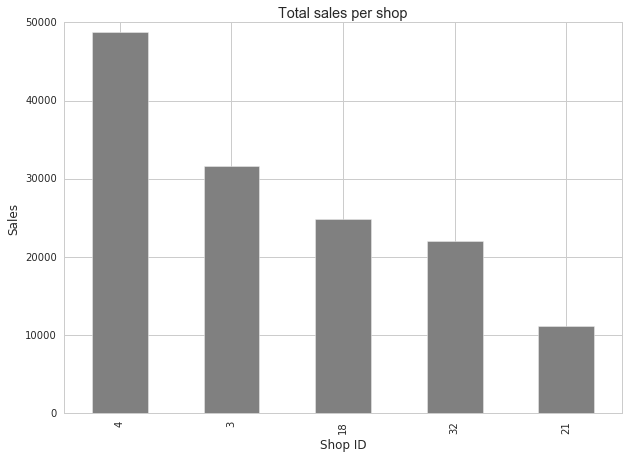

In [74]:
plt.figure(figsize=(10,7))
plt.xlabel("Shop ID")
plt.ylabel("Sales")
dat["shop_id"].value_counts().plot(kind="bar", title="Total sales per shop", color="grey")
plt.show()

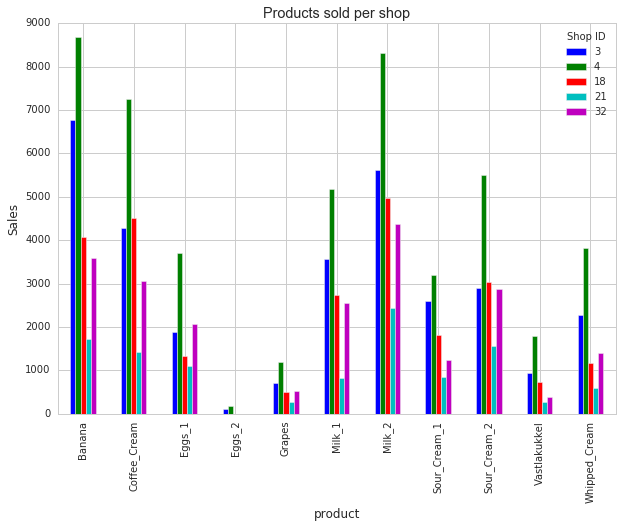

In [173]:
group = dat[["product", "shop_id", "time"]].groupby(["product", "shop_id"]).count().unstack()

f = plt.figure(figsize=(10,7))
plt.xlabel("Product")
plt.ylabel("Sales")
group.plot(kind="bar", ax=f.gca(), title='Products sold per shop')
plt.legend(title="Shop ID", labels=group.columns.levels[1])
plt.show()


## TASK 3

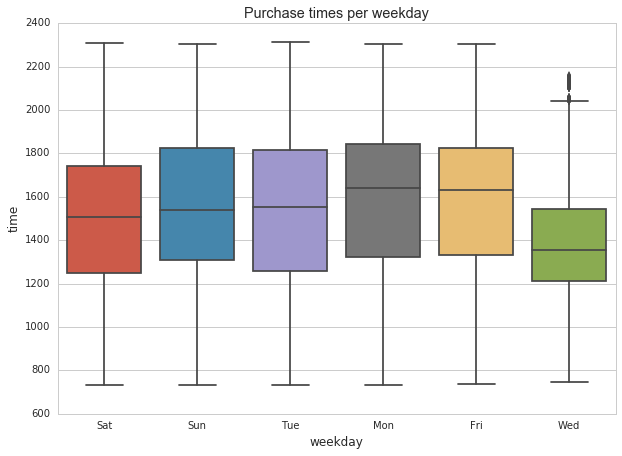

In [160]:
f = plt.figure(figsize=(10,7))
plt.xlabel("Weekday")
plt.ylabel("Time")
plt.title('Purchase times per weekday')
sns.boxplot(x="weekday", y="time", data=dat)
plt.show()

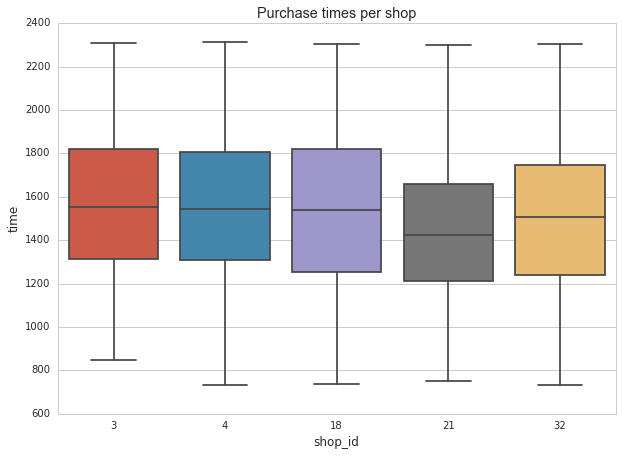

In [163]:
f = plt.figure(figsize=(10,7))
plt.xlabel("Shop ID")
plt.ylabel("Time")
plt.title('Purchase times per shop')
sns.boxplot(x="shop_id", y="time", data=dat)
plt.show()

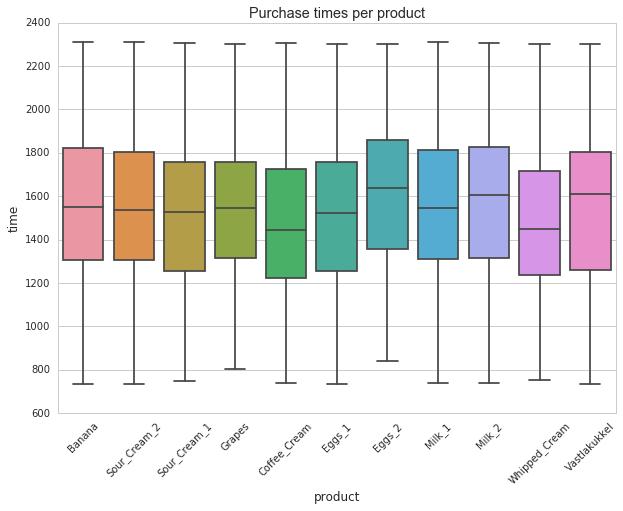

In [168]:
f = plt.figure(figsize=(10,7))
plt.xlabel("Product")
plt.ylabel("Time")
plt.title('Purchase times per product')
plt.xticks(rotation=45)
sns.boxplot(x="product", y="time", data=dat)
plt.show()

## TASK 4

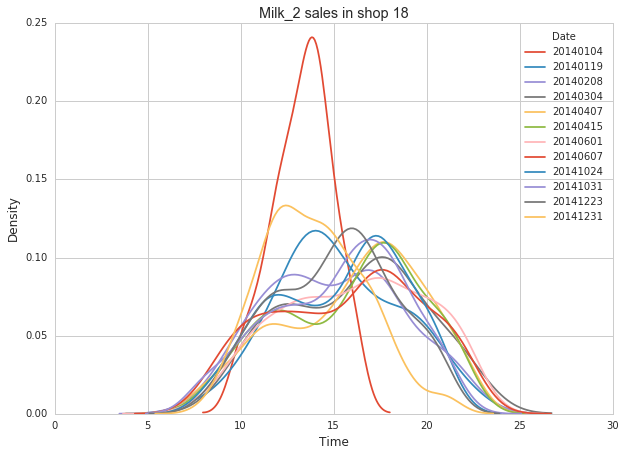

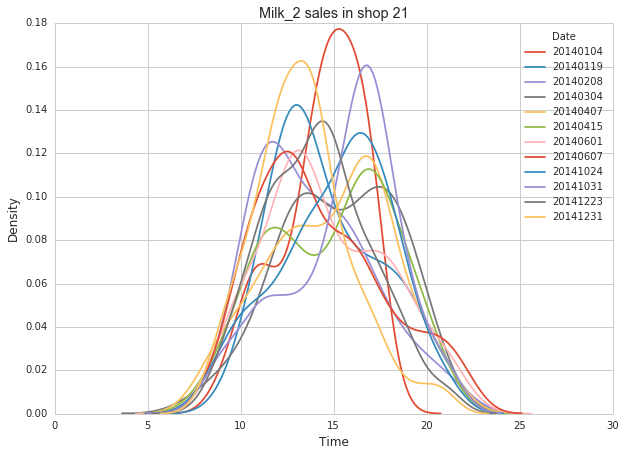

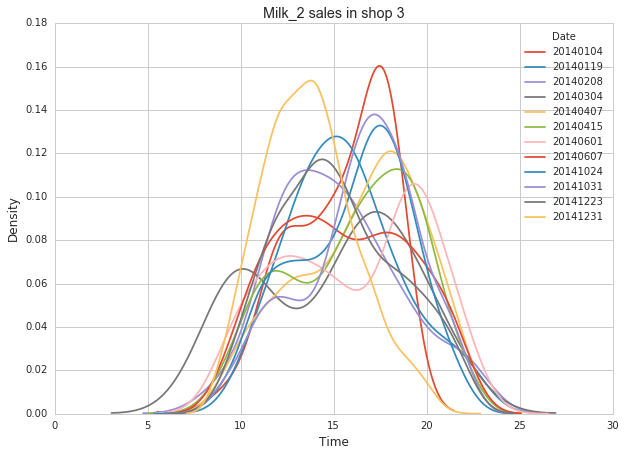

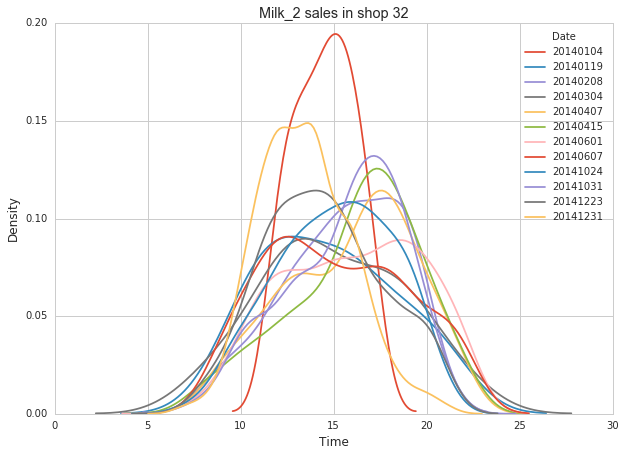

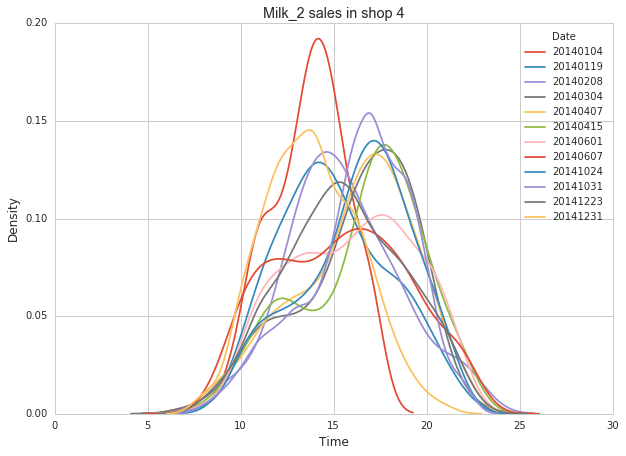

In [213]:
def plotSales(dates, shop_id, product):
    plt.figure(figsize=(10,7))
    plt.xlabel("Time")
    plt.ylabel("Density")
    plt.title(product + " sales in shop " + str(shop_id))
    for date in dates:
        subset = dat[(dat["date"] == date) & (dat["shop_id"] == shop_id) & (dat["product"] == product)]["hour"]
        sns.kdeplot(subset, label=date)
    plt.legend(title="Date")
    plt.show()
    
dates = dat["date"].unique()
shops = dat["shop_id"].unique()

for shop in shops:
    plotSales(dates, shop, "Milk_2")


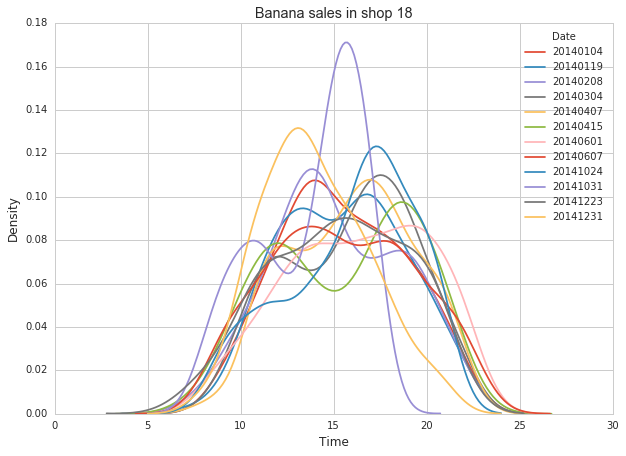

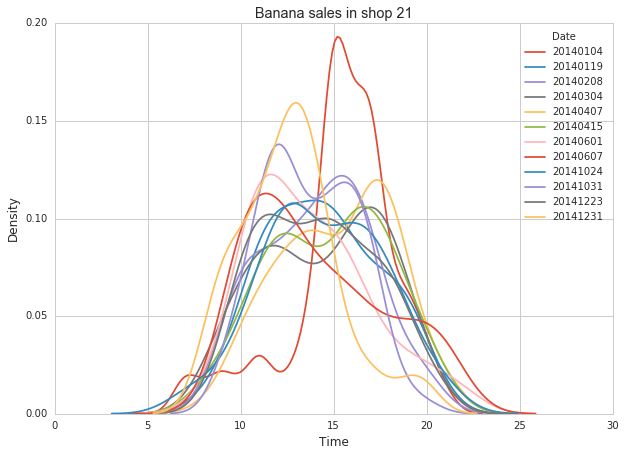

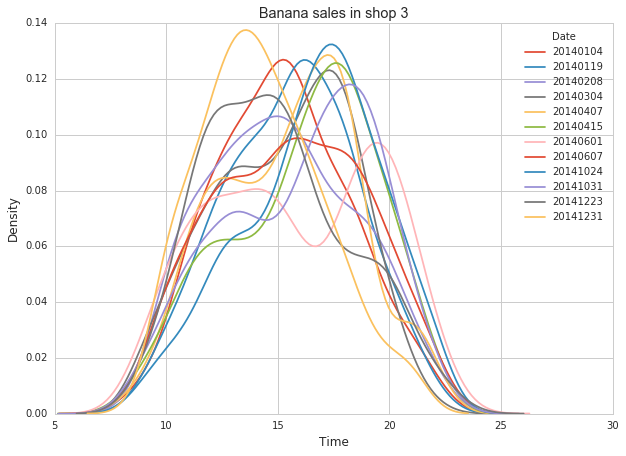

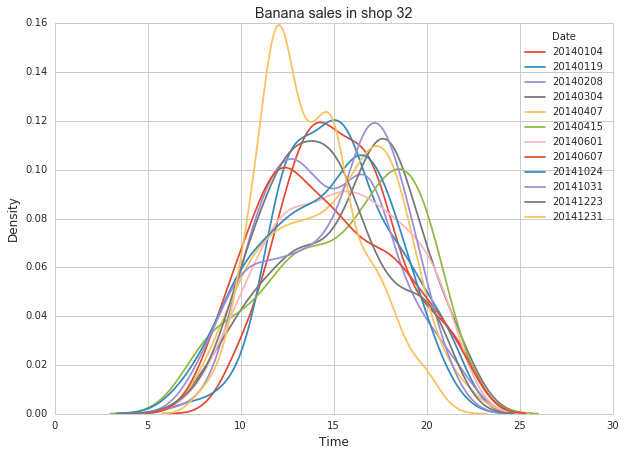

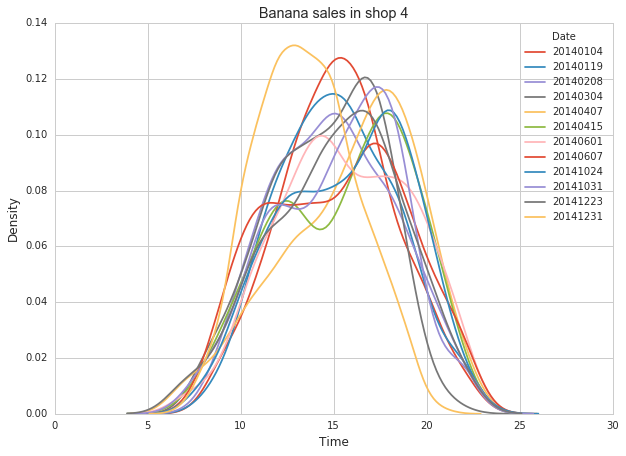

In [214]:
for shop in shops:
    plotSales(dates, shop, "Banana")

## TASK 5

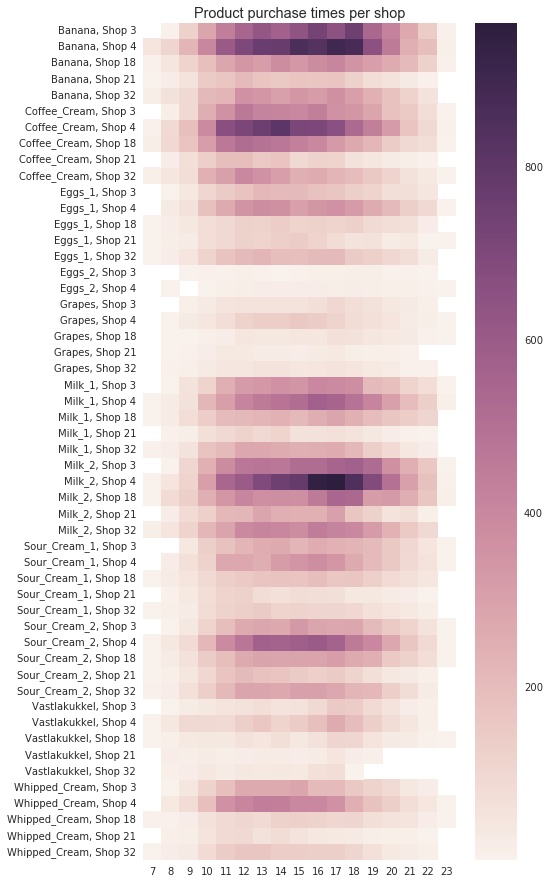

In [246]:
grouped = dat[["product", "shop_id", "hour", "time"]].groupby(["product", "shop_id", "hour"]).count().unstack()
new_index = [str(grouped.index.get_level_values(0)[i]) + ", Shop " + str(grouped.index.get_level_values(1)[i]) 
             for i in range(len(grouped.index.get_level_values(0)))]
grouped.columns = [i for i in range(7, 24)]
grouped.index = new_index


f = plt.figure(figsize=(7,15))
plt.xlabel("Hour")
plt.ylabel("Product and shop")
plt.title('Product purchase times per shop')
sns.heatmap(grouped)
plt.show()


## TASK 6

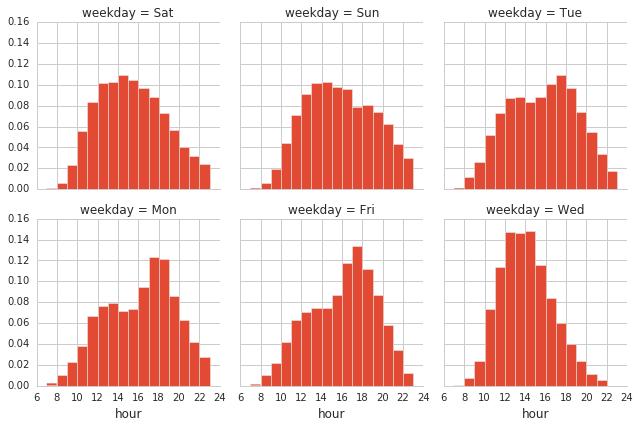

In [269]:
g = sns.FacetGrid(dat, col="weekday", col_wrap=3, margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(sns.distplot, "hour", bins=range(7,24), kde=False, norm_hist=True, hist_kws={"alpha": 1})

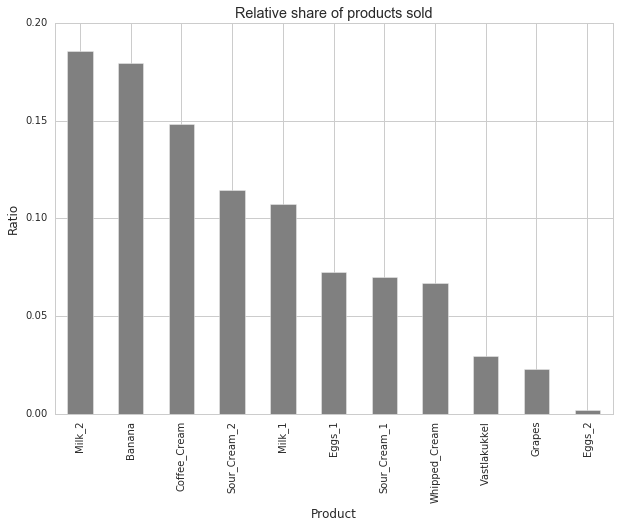

In [276]:
plt.figure(figsize=(10,7))
plt.xlabel("Product")
plt.ylabel("Ratio")
(dat["product"].value_counts() / dat.shape[0]).plot(kind="bar", title="Relative share of products sold", color="grey")
plt.show()

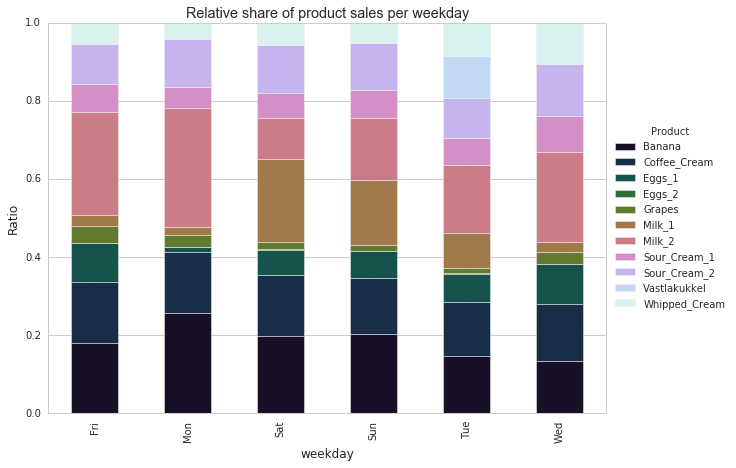

In [303]:
def f(s):
    return s / s.sum()

group = dat[["product", "weekday", "time"]].groupby(["weekday", "product"]).count().unstack().apply(f, axis=1)

colors = sns.color_palette("cubehelix", 11)
f = plt.figure(figsize=(10,7))
plt.xlabel("Weekday")
plt.ylabel("Ratio")
group.plot(kind="bar", stacked=True, ax=f.gca(), title='Relative share of product sales per weekday', color=colors)
plt.legend(title="Product", labels=group.columns.levels[1], loc='center left', bbox_to_anchor=(1, 0.5))
ax = f.gca()
ax.set_ylim([0,1])
plt.show()
